<a href="https://colab.research.google.com/github/vmjs1234/CLUSTERING_ASSIGNMENT/blob/main/e_)_Anomaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Install necessary libraries
!pip install pyod pandas matplotlib seaborn scikit-learn


In [13]:

# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyod.models.iforest import IForest  # Isolation Forest
from sklearn.preprocessing import StandardScaler


In [14]:

# Step 1: Load the Yahoo Webscope S5 dataset (or any time series data)
# Simulate a time series dataset for demonstration purposes
np.random.seed(42)
time = np.arange(0, 300, 1)
values = np.sin(time * 0.1) + np.random.normal(0, 0.1, size=len(time))  # Normal time series data
anomalies = [50, 150, 250]  # Inject anomalies at specific points
values[anomalies] += 2  # Add anomalies by increasing the value significantly


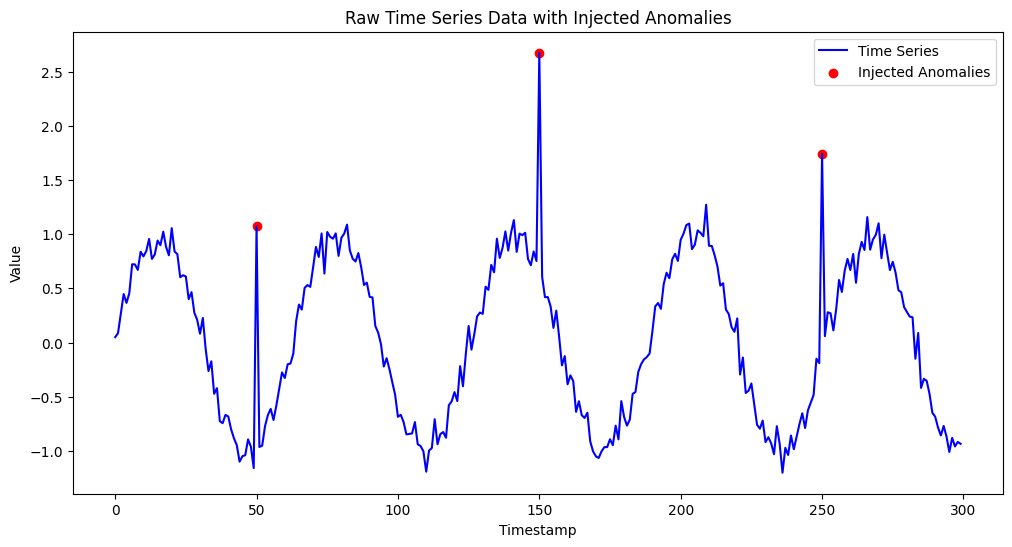

In [15]:

# Create a DataFrame to mimic a time series dataset
data = pd.DataFrame({'timestamp': time, 'value': values})

# Step 2: Visualize the raw time series data
plt.figure(figsize=(12, 6))
plt.plot(data['timestamp'], data['value'], label='Time Series', color='blue')
plt.scatter(data['timestamp'][anomalies], data['value'][anomalies], color='red', label='Injected Anomalies')
plt.title("Raw Time Series Data with Injected Anomalies")
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.legend()
plt.show()


In [16]:

# Step 3: Preprocess the data (scaling)
scaler = StandardScaler()
data['scaled_value'] = scaler.fit_transform(data[['value']])


In [17]:

# Step 4: Train an anomaly detection model using PyOD (Isolation Forest)
model = IForest(contamination=0.1)  # Assume ~10% anomalies in the data
model.fit(data[['scaled_value']])


IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [18]:

# Step 5: Predict anomalies and get anomaly scores
data['anomaly_label'] = model.labels_  # Binary labels (0: normal, 1: anomaly)
data['anomaly_score'] = model.decision_scores_  # Raw anomaly scores


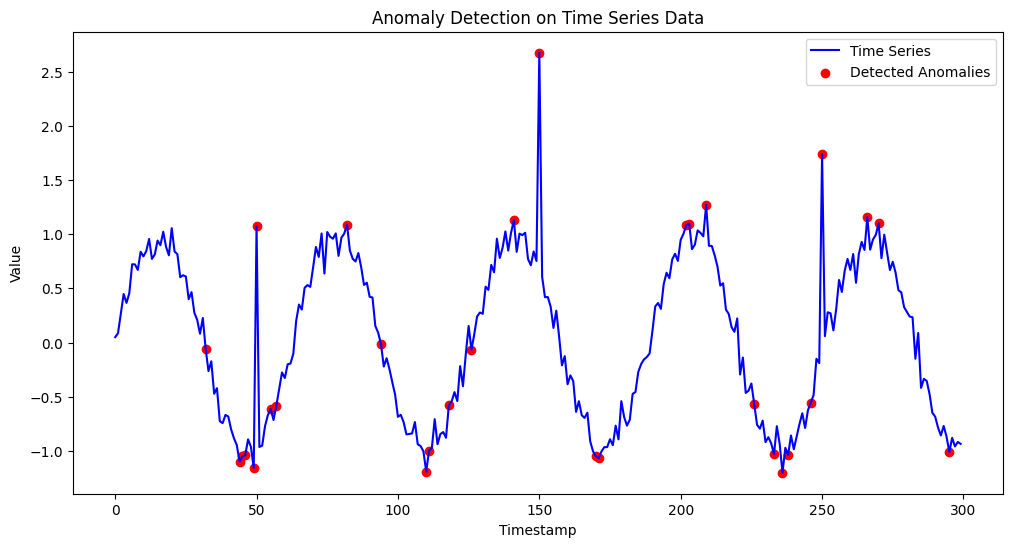

In [19]:

# Step 6: Visualize results

## Plot the time series with detected anomalies
plt.figure(figsize=(12, 6))
plt.plot(data['timestamp'], data['value'], label='Time Series', color='blue')
plt.scatter(data['timestamp'][data['anomaly_label'] == 1],
            data['value'][data['anomaly_label'] == 1],
            color='red', label='Detected Anomalies')
plt.title("Anomaly Detection on Time Series Data")
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.legend()
plt.show()


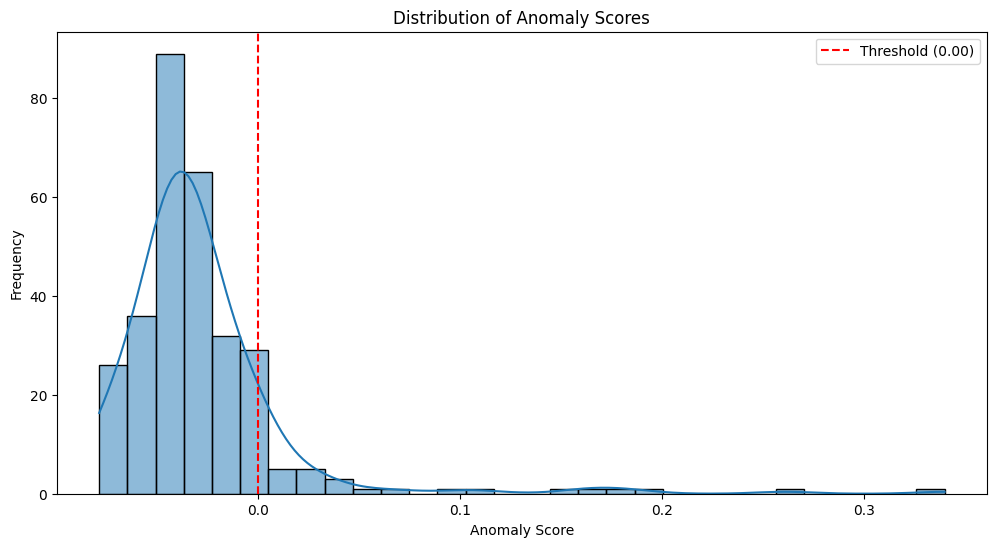

In [20]:

## Plot anomaly scores distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['anomaly_score'], kde=True, bins=30)
threshold = np.percentile(data['anomaly_score'], (1 - model.contamination) * 100)  # Threshold for anomalies
plt.axvline(threshold, color='red', linestyle='--', label=f"Threshold ({threshold:.2f})")
plt.title("Distribution of Anomaly Scores")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()


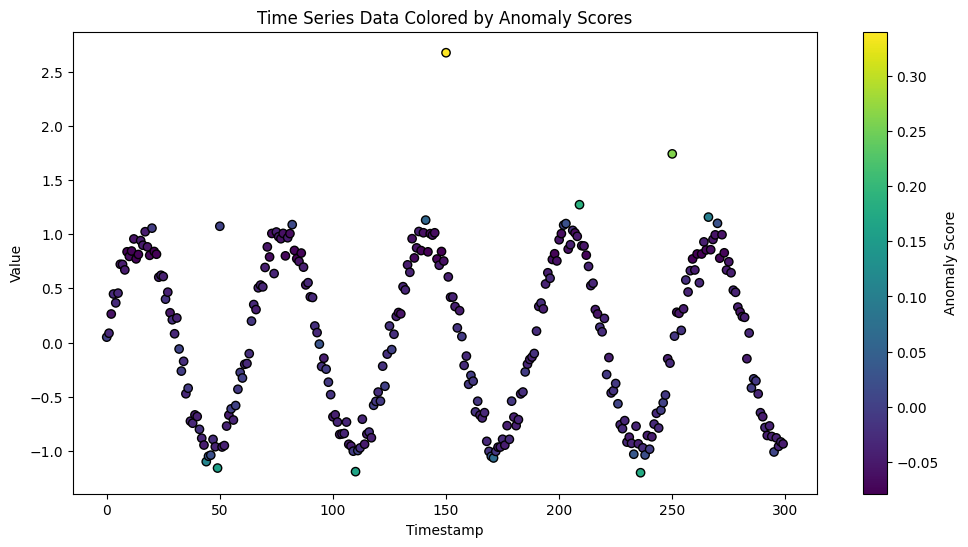

In [21]:

## Scatter plot with anomaly scores as color gradient
plt.figure(figsize=(12, 6))
scatter = plt.scatter(data['timestamp'], data['value'], c=data['anomaly_score'], cmap='viridis', edgecolor='k')
cbar = plt.colorbar(scatter)
cbar.set_label("Anomaly Score")
plt.title("Time Series Data Colored by Anomaly Scores")
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.show()